/var/folders/_k/r3pnjytj3056tzyf_rpysh7h0000gn/T/ipykernel_56820/238657481.py:14: DeprecationWarning: Please use `pearsonr` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  from scipy.stats.stats import pearsonr


[[7036]
 [   0]
 [4988]
 [   0]] [[2401]
 [   0]
 [1128]
 [   0]]
dict_values([7036, 0, 4988, 0])
dict_values([2401, 0, 1128, 0])


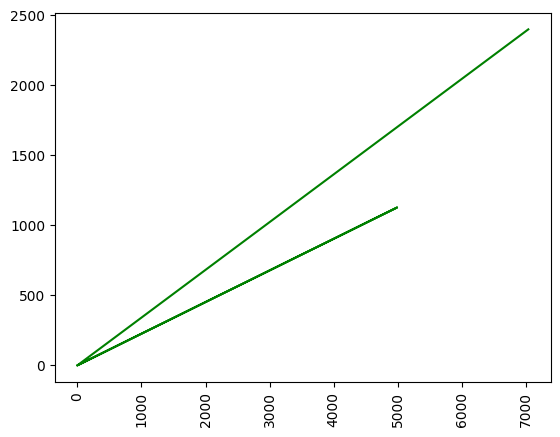

In [54]:
import nltk
from nltk.corpus import nps_chat
import re
import matplotlib.colors as mcolors
from collections import defaultdict
import matplotlib.pyplot as plt
import string
from nltk.corpus import nps_chat
from nltk.tokenize import RegexpTokenizer
from sklearn.linear_model import LinearRegression
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats.stats import pearsonr
from scipy import stats
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as pp
import pandas as pd
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd
import empath
import sys
import gensim.corpora as corpora
from pprint import pprint
import gensim
import pyLDAvis.gensim
import pickle 
import pyLDAvis
import os
import datetime
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.corpus import stopwords
stop_words = stopwords.words('english')


corpus_teen = {"words":[], "tagged_words":[],"tagged_sentences":[], "sentences":[],"topics":[],"dialogs":[]}
corpus_adult = {"words":[],"tagged_words":[],"tagged_sentences":[], "sentences":[],"topics":[], "dialogs":[]}

class ChatCorpora:
    tokenizer = RegexpTokenizer(r'\w+')


    #personalpronoun, Proper noun, singular, Proper noun, plural,Possessive pronoun
    pronouns = {"NNP", "PRP","NNP", "PRP$"}
    adjectives = {"ADJ"}

    def __init__(self):
       self._get_chat_data()
            
    
    def _preprocess(self,list1):
        
        flat_list = []
        if not isinstance(list1, list):
            flat_list.append(list1)
        else:
            for sublist in list1:
                if not isinstance(sublist, list):
                    flat_list.append(sublist)
                else:
                    for item in sublist:
                        flat_list.append(item)
        
        flat_list2 = [word for word in flat_list if re.match(r'[^\W\d]*$', word) and word[0] != 'JOIN' and word[0] != 'PART' and word[0] != 'ACTION' and word[0] not in stop_words ]
        return flat_list2

    

    def _get_chat_data(self):
       
        for i, p in enumerate(nps_chat.xml_posts()):
           
            if p.get("user").find("teen") != -1 :
                
                corpus["tagged_sentences"].append(list((t.get("word"), t.get("pos")) for t in p[0])) 
            else:             
                corpus_adult["tagged_sentences"].append(list((t.get("word"), t.get("pos")) for t in p[0]))  


        
        for sen in corpus["tagged_sentences"]:
            for word in sen:
                
                if re.match(r'[^\W\d]*$', word[0]) and word[0] != 'JOIN' and word[0] != 'PART' and word[0] != 'ACTION' and word[0] not in stop_words :                
                    corpus["tagged_words"].append(word)
                    corpus["words"].append(word[0].lower())
  
        for sen in corpus_adult["tagged_sentences"]:
            for word in sen:
                if re.match(r'[^\W\d]*$', word[0]) and word[0] != 'JOIN' and word[0] != 'PART' and word[0] != 'ACTION' and word[0] not in stop_words:
                    corpus_adult["tagged_words"].append(word)
                    corpus_adult["words"].append(word[0].lower())


        
        sentence = {"sentence":"","pronouns":0, "adjectives": 0}
        
        for sen in corpus["tagged_sentences"]:
            if re.match(r'[^\W\d]*$', sen[0][0]) and sen[0][0] != 'JOIN' and sen[0][0] != 'PART' and sen[0][0] != 'ACTION'  :
                sentence["sentence"] = sen
                pro = 0
                adj = 0
                for word in sen:
                    if word[1] in self.pronouns:
                        pro +=1
                    if word[1] in self.adjectives:
                        adj +=1
                corpus["sentences"].append({"sentence":sen,"pronouns":pro, "adjectives": adj})
              
        sentence_adult = {"sentence":"","pronouns":0, "adjectives": 0}
        
        for sen in corpus_adult["tagged_sentences"]:
            if re.match(r'[^\W\d]*$', sen[0][0]) and sen[0][0] != 'JOIN' and sen[0][0] != 'PART' and sen[0][0] != 'ACTION'   :
                sentence_adult["sentence"] = sen
                pro = 0
                adj = 0
                for word in sen:
                    if word[1] in self.pronouns:
                        pro +=1
                    if word[1] in self.adjectives:
                        adj +=1
                corpus_adult["sentences"].append({"sentence":sen,"pronouns":pro, "adjectives": adj})
     
               

class ZipfFrequenceData:

    
    def get_frequence_data_words(self, corpus):
        
        distribution = defaultdict(int)
        

        for word in corpus:
            distribution[word]+=1
        
        np.seterr(divide = 'ignore') 
        distribution1 = sorted(distribution.items(), key=lambda x:x[1], reverse = True)
        max_val = distribution1[0][1]
  
        distribution = {}
      
        for val in distribution1:
            distribution[val[0]] = val[1]/max_val     
        return distribution

    
    def get_frequence_data_sentence(self,corpus_dict):
        
        distribution = defaultdict(int)

        for sen in corpus_dict:
            
            distribution[str(sen["sentence"])] = len(sen["sentence"])
            
       
        np.seterr(divide = 'ignore') 
        distribution1 = sorted(distribution.items(), key=lambda x:x[1], reverse = True)
        max_val = distribution1[0][1]
  
        distribution = {}
      
        for val in distribution1:
            distribution[val[0]] = val[1]/max_val     
        return distribution


    def get_frequence_data_pronouns(self,corpus_dict):
        distribution = defaultdict(int)

        for sen in corpus_dict:
            distribution[str(sen["sentence"])] = sen["pronouns"]

        
            
       
        np.seterr(divide = 'ignore') 
        distribution1 = sorted(distribution.items(), key=lambda x:x[1], reverse = True)
        max_val = distribution1[0][1]
  
        distribution = {}
      
        for val in distribution1:
            distribution[val[0]] = val[1]/max_val     
        return distribution

    def get_frequence_data_adjectives(self,corpus_dict):
        distribution = defaultdict(int)

        for sen in corpus_dict:
            distribution[str(sen["sentence"])] = sen["adjectives"]

        
            
       
        np.seterr(divide = 'ignore') 
        distribution1 = sorted(distribution.items(), key=lambda x:x[1], reverse = True)
        max_val = distribution1[0][1]
  
        distribution = {}
      
        for val in distribution1:
            distribution[val[0]] = val[1]/max_val     
        return distribution
        

    def get_zipf_data(self,count):
        result = []
        for i in range(count):
            result.append(1/(i +1))
        return result
    
  



class ShowData:
    
    def _get_prediction_interval(self, model_line_point, y_data, model_line, pi=.90):
       
        
        sum_errs = np.sum((y_data - model_line)**2)
        stdev = np.sqrt(1 / (len(y_data) - 2) * sum_errs)
        one_minus_pi = 1 - pi
        ppf_lookup = 1 - (one_minus_pi / 2)
        z_score = stats.norm.ppf(ppf_lookup)
        interval = z_score * stdev

        lower, upper = model_line_point - interval, model_line_point + interval
        return lower, model_line_point, upper
 

   

    def _tokens_outside_bounds(self, data, upper_interval, lower_interval):

        data2 = []
        sum2 = 0
        sum_all = 0
        
        for i, d in enumerate(data):
            sum_all += data[i]
            #print("DATA_____: ", d, upper_interval[i], lower_interval[i])
            if (data[i] > upper_interval[i])| (data[i] < lower_interval[i]):
                data2.append(data[i])
                sum2 += data[i]

        outside_values = sum2

        
        result = outside_values/sum_all * 100
        print("Result: ", result)
        
        return result
        
    
    
    def show_data(self, distribution, zipf, name):
  
        
        data_y = list(distribution.values())
        data_x = np.arange(1,len(data_y) + 1,1)
      

      
        lower_interval = []
        upper_interval = []
        
       
        log_x = np.log10(data_x)
        log_y = np.log10(data_y)
        
        
        log_x_composed = log_x.reshape(-1,1)
       
        lin_regression = LinearRegression().fit(log_x_composed, log_y)
        model_line = lin_regression.predict(log_x_composed)
        
        
        for m in model_line:
            lower, prediction, upper =  self._get_prediction_interval(m,log_y, model_line)
            lower_interval.append(lower)
            upper_interval.append(upper)
    
        
        plt.figure
        #plt.axes().set_aspect('equal')
        plt.xlabel('Rangking')
        plt.ylabel('Frequencies')
        #plt.plot(data_x,data_y, color='green', label='Zipf loglog distribution')
        
        plt.title(f'Loglog distribution {name}' )
        plt.plot(log_x,log_y, color='green', label='Zipf loglog distribution')
        plt.plot(log_x, model_line, color='orange', label='Regression' )
        print(len(log_x), len(upper_interval), len(lower_interval))
        plt.fill_between(log_x,upper_interval,lower_interval , color='b',label='Confidence Interval', alpha=.2)
        #plt.plot(np.arange(0,len(y_data),1),y_data,color='orange',label='Real data')
        
        print(self._tokens_outside_bounds( log_y, upper_interval, lower_interval))
        plt.show()
    





#data = ZipfFrequenceData().get_frequence_data_words(corpus_adult["words"])
#data = ZipfFrequenceData().get_frequence_data_sentence(corpus_adult["sentences"])
#zipf = ZipfFrequenceData().get_zipf_data(len(data))
#ShowData().show_data(data,zipf)



#3. Wordcloud


 
# Reads 'Youtube04-Eminem.csv' file 


class ShowWordCloud:
    def show_word_cloud(self, corpus):
        stopwords = set(STOPWORDS)

     
        comment_words = " ".join(corpus)+" "
         
        wordcloud = WordCloud(width = 800, height = 800,
                        background_color ='white',
                        stopwords = stopwords,
                        min_font_size = 10).generate(comment_words)
         
        # plot the WordCloud image                       
        plt.figure(figsize = (8, 8), facecolor = None)
        plt.imshow(wordcloud)
        plt.axis("off")
        plt.tight_layout(pad = 0)
         
        plt.show()



#ShowWordCloud().show_word_cloud(corpus_adult["words"])

#4
class EmpathClient:

    def show_empath_tables(self):
        lexicon = empath.Empath()
    
        adult_chat = corpus_adult["words"]
        teen_chat = corpus["words"]
        
        adult_categories = lexicon.analyze(adult_chat, normalize=True)
        teen_categories = lexicon.analyze(teen_chat, normalize=True)
        
        def top_categories(categories, n=10):
          return sorted(categories.items(), key=lambda x: x[1], reverse=True)[:n]
        
        #print(top_categories(adult_categories, 30))
        #print(top_categories(teen_categories, 30))
        adult_data = (top_categories(adult_categories, 30))
        teen_data = (top_categories(teen_categories, 30))
       
        df = pd.DataFrame(teen_data, columns = ["categories", "freuency"])
        df_adult = pd.DataFrame(adult_data, columns = ["categories", "freuency"])

       
     
        #print(df)
        #print(df_adult)

        print(df.compare(df_adult))

        


#EmpathClient().show_empath_tables()

#5

class LDAModel:
   
    def print_keywords(self,num_of_topics, dataset, mode):
        
        #print(dataset)
        data_words = [dataset]#[d.split() for d in dataset]
   
        id2word = corpora.Dictionary(data_words)
        # Create Corpus
        texts = data_words
        # Term Document Frequency
        corpus = [id2word.doc2bow(text) for text in texts]
        # View
        #print(corpus[:1][0][:30])
        
        
        # number of topics
        num_topics = num_of_topics
        # Build LDA model
        lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                               id2word=id2word,
                                               num_topics=num_topics,
                                                eta=5)
        topic_list = []
        # Print the Keyword in the 10 topics
        for topic in lda_model.print_topics():
            list1 = []
            topics0 = topic[1].split('+')
            for topic0 in topics0:
                topic1 = topic0.split('*')
                #print(topic1[1])
                topic1[1] = topic1[1].replace('"','')
                list1.append(topic1[1].strip())
            
            
            topic_list.append(list1)
        t_dict = {}
       
        if mode == "teen":
            corpus_teen["topics"] = topic_list
        else:
             corpus_adult["topics"] = topic_list
        doc_lda = lda_model[corpus]
        #self.show_LDA_data( lda_model, corpus, id2word, num_topics)
        #print(corpus["topics"])
        
        
        
        
    def show_LDA_data(self, lda_model, corpus, id2word, num_topics):
        
           
        # Visualize the topics
        pyLDAvis.enable_notebook(local=True)
        LDAvis_data_filepath = os.path.join('./results/ldavis_prepared_'+str(num_topics))
        # # this is a bit time consuming - make the if statement True
        # # if you want to execute visualization prep yourself
        LDAvis_prepared = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
        '''
        if 1 == 1:
            LDAvis_prepared = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
            with open(LDAvis_data_filepath, 'wb') as f:
                pickle.dump(LDAvis_prepared, f)
        # load the pre-prepared pyLDAvis data from disk
        with open(LDAvis_data_filepath, 'rb') as f:
            LDAvis_prepared = pickle.load(f)
        pyLDAvis.save_html(LDAvis_prepared, './results/ldavis_prepared_'+ str(num_topics) +'.html')
        '''
        display(LDAvis_prepared)


#6
class VaderScore:
    
    def display_vader_score(self, dataset, mode):
        LDAModel().print_keywords(10, dataset,mode)
        if mode == "teen":
            text = corpus_teen["topics"]
        else:
            text = corpus_adult["topics"]
        if text == []:
            text = LDAModel().print_keywords(10, dataset, mode)
        
        
        df = text
        text2 = []
        for t in text:
            print(t)
            t = ' '.join(t)
            text2.append(t)
            #print(t)
        #print(text2)
        df = text2
        sid = SentimentIntensityAnalyzer()
        vader_keywords = []
        vader_score = []
        
        for t in text2:
            #list2.append((t,sid.polarity_scores(t)))
            #vader.append([t, sid.polarity_scores(t)])
            vader_keywords.append(t)
            vader_score.append(sid.polarity_scores(t))
            #vader.append(vader)
        #print(vader)
        df_vader= pd.DataFrame( {"keywords": vader_keywords,"score": vader_score})
        #print(df_vader)
        display(df_vader)




#7
class CoherenceOfCorpus:

    
    def coherence(self,dataset,mode):
        ChatCorpora()
        
        LDAModel().print_keywords(10, dataset, mode)
        if mode == "teen":
            topics_list = corpus_teen["topics"]
        else:
            topics_list = corpus_adult["topics"]
        
        for topic in topics_list:
            print(topic)
        
        word_coherence = {}
        for word in dataset:
            word_coherence[word] = 0

        corpus1 = list(set(dataset))
        for word in corpus1:
            
            for i, topics in enumerate(topics_list):
                  
                if word.strip() in list(set(topics_list[i])):
                    word_coherence[word]+=1
        #print(word_coherence.keys())
        values = list(word_coherence.values())
        values2 = []
        for v in values:
            v = (v-1)/10
            values2.append(v)
        #print(values2)
        max1 = max(values2)
        #print(max1)
        #print(word_coherence)

        coherence = 1-max1
        return coherence
        
                    
                                

#8
class ShowDialogAct:

    def __init__(self):
       
        
        self.dialogs_teen ={"Emotion":0, "ynAnswer":0, "Continuer":0, "WhQuestion":0, "System":0, "Accept":0, "Clarity":0
                     , "Emphasis":0, "nAnswer":0, "Great":0, "Statement":0, "Reject":0, "Bye":0, "Others":0
            }
        self.dialogs_adult ={"Emotion":0, "ynAnswer":0, "Continuer":0, "WhQuestion":0, "System":0, "Accept":0, "Clarity":0
                     , "Emphasis":0, "nAnswer":0, "Great":0, "Statement":0, "Reject":0, "Bye":0, "Others":0
            }
    
    
    def show_dialog_act(self):
        #print(corpus["sentences"])
        for i, p in enumerate(nps_chat.xml_posts()):
               
            if p.get("user").find("teen") != -1 :
                da = p.get("class")
                test = da in self.dialogs_teen.keys()
                #print(dialogs.keys(), da, test )
                if da in self.dialogs_teen.keys():
                    self.dialogs_teen[da] +=1
                    #if da == "Bye":
                        #print(da, dialogs[da])
            else:
                da = p.get("class")
                test = da in self.dialogs_adult.keys()
                    #print(dialogs.keys(), da, test )
                if da in self.dialogs_adult.keys():
                    self.dialogs_adult[da] +=1
                    #if da == "Bye":
                            #print(da, dialogs_adult[da])

        
        print(self.dialogs_teen.values())
        plt.figure
        plt.bar(self.dialogs_teen.keys(),self.dialogs_teen.values(),color ='red',
        width = 0.4)
        plt.xticks(rotation=90)
        plt.show()

        print(self.dialogs_adult.values())
        plt.figure
        plt.bar(self.dialogs_adult.keys(),self.dialogs_adult.values(),color ='blue',
        width = 0.4)
        plt.xticks(rotation=90)
        plt.show()
        
        corpus_teen["dialogs"] = self.dialogs_teen
        corpus_adult["dialogs"] = self.dialogs_adult





dates = {}
vocabulary = {}
teen_dates = {}
teen_dates_vocabulary = {}
teen_vocabulary_set = set()
adult_dates = {}
adult_dates_vocabulary = {}
adult_vocabulary_set = set()

#9 & 10
class TimelyDescretionTeen:

    def _get_prediction_interval(self, model_line_point, y_data, model_line, pi=.90):
       
        
        sum_errs = np.sum((y_data - model_line)**2)
        stdev = np.sqrt(1 / (len(y_data) - 2) * sum_errs)
        one_minus_pi = 1 - pi
        ppf_lookup = 1 - (one_minus_pi / 2)
        z_score = stats.norm.ppf(ppf_lookup)
        interval = z_score * stdev

        lower, upper = model_line_point - interval, model_line_point + interval
        return lower, model_line_point, upper
 


    def _preprocess(self, list1):
        
        flat_list = []
        if not isinstance(list1, list):
            flat_list.append(list1)
        else:
            for sublist in list1:
                if not isinstance(sublist, list):
                    flat_list.append(sublist)
                else:
                    for item in sublist:
                        flat_list.append(item)
            
        flat_list2 = [word for word in flat_list if re.match(r'[^\W\d]*$', word) and word != 'JOIN' and word != 'PART' and word not in 
                      stop_words]
        return flat_list2

   
    
    def get_interval(self,list1, b, c):
        list1 = sorted(list1)
        d1 = datetime.datetime(2006, 1, 1).timestamp()
        d2 = datetime.datetime(2006, 1, 2) .timestamp()
        i0 = (d2-d1)

        
        t_min = list1[0] -b*i0
        t_max = list1[-1] -b*i0
       
        interval =  c*i0
        return t_min, t_max,interval

    
    def timely_descretion(self, mode, mode2):
        for p in nps_chat.xml_posts():
            
            datetime1 = datetime.datetime(2006, int(p.get("user")[0:2]), int(p.get("user")[3:5])).timestamp() 
            if p.get("user").find("teen") != -1 :
            
                teen_dates[datetime1] = 0
                teen_dates_vocabulary[datetime1] = 0
            else:
                adult_dates[datetime1] = 0
                adult_dates_vocabulary[datetime1] = 0
            

   
        for p in nps_chat.xml_posts():
            
            datetime1 = datetime.datetime(2006, int(p.get("user")[0:2]), int(p.get("user")[3:5])).timestamp()
            if p.get("user").find("teen") != -1 :

               
                list1 = list(t.get("word") for t in p[0]  if re.match(r'[^\W\d]*$', t.get("word") ) 
                             and t.get("word") != 'JOIN' and t.get("word")  != 'PART' and t.get("word")  != 'ACTION' and t.get("word") not in stop_words)
            
                if list1 != []:
                    list2 = self._preprocess(list1)
                    
                    teen_dates[datetime1] += len(list2)
                    for t in list2:
                        if t not in teen_vocabulary_set:
                        
                            teen_dates_vocabulary[datetime1] += 1
                            teen_vocabulary_set.add(t) 

            else:
                list1 = list(t.get("word") for t in p[0]  if re.match(r'[^\W\d]*$', t.get("word") ) 
                             and t.get("word") != 'JOIN' and t.get("word")  != 'PART' and t.get("word")  != 'ACTION' and t.get("word") not in stop_words)
            
                if list1 != []:
                    list2 = self._preprocess(list1)
                    
                    adult_dates[datetime1] += len(list2)
                    for t in list2:
                        if t not in adult_vocabulary_set:
                            adult_dates_vocabulary[datetime1] += 1
                            adult_vocabulary_set.add(t) 
                
        

        if mode == "teen":
            dates = teen_dates
            vocabulary = teen_dates_vocabulary
            date_vocabulary_set = teen_vocabulary_set
        else:
            dates = adult_dates
            vocabulary = adult_dates_vocabulary
            date_vocabulary_set = adult_vocabulary_set
            

        
        startdate = 0
        dayinterval = 7
        #sorted_dates = sorted(list(teen_dates_vocabulary.keys()))
        min0,max0, interval = self.get_interval(dates,startdate,dayinterval)
       
       
        
        interval_list = {}
        interval_list_vocabulary = {}
        interval_values = 0
        key0 = min0


        
        while key0 < max0 :
            interval_list[key0] = 0
            interval_list_vocabulary[key0] = 0
            key0 += interval

        interval_keys = list(interval_list.keys())
       
        
        for d in dates.keys():
            for i, key  in enumerate(interval_keys):
                
                if i < len(interval_keys) -1:
                    if d >= interval_keys[i] and d < interval_keys[i+1]:
                    
                        interval_list[interval_keys[i]] += dates[d]

        for d in vocabulary.keys():
            for i, key  in enumerate(interval_keys):
                if i < len(interval_keys) -1:
                    if d >= interval_keys[i] and d < interval_keys[i+1]:
                        interval_list_vocabulary[interval_keys[i]] += vocabulary[d]
                    
         
        #####################
        values = interval_list.values()
        values_vocabulary = interval_list_vocabulary.values()
        

       
        keys= []
        for i in interval_list:
            keys.append(datetime.datetime.fromtimestamp(i))

        values_array = np.array(list(values))
        values_array = values_array.reshape(-1,1)

        values_array_vocabulary = np.array(list(values_vocabulary))
        values_array_vocabulary = values_array_vocabulary.reshape(-1,1)
        values_array = values_array.reshape(-1,1)

        print(values_array, values_array_vocabulary)
        lin_regression = LinearRegression().fit(values_array, values_array_vocabulary)
        model_line = lin_regression.predict(values_array)
        
        lower_interval = []
        upper_interval = []
        for m in model_line:
            lower, prediction, upper =  self._get_prediction_interval(m,values_array_vocabulary , model_line)
            lower_interval.append(lower)
            upper_interval.append(upper)

        print(values)
        print(values_vocabulary)
    
        
       

        if mode2 == "heaps":
            plt.figure
            plt.plot(values_array,values_array_vocabulary,color ='green')
            plt.xticks(rotation=90)
            plt.show()

        else:
            plt.figure
            plt.plot(keys,values,color ='red')
            plt.xticks(rotation=90)
        
        
            plt.plot(keys,values_vocabulary,color ='blue')
            plt.xticks(rotation=90)
            plt.show
        
       
  
#ShowDialogAct().show_dialog_act()
class ZipfTestingWithNPSChatCorpora:
    ChatCorpora() #creates adult and teen dictionaries
    teen_data = corpus["words"]
    adult_data = corpus_adult["words"]
    '''
    ChatCorpora()
    teens = ZipfFrequenceData().get_frequence_data_words(corpus["words"])
    zipf = ZipfFrequenceData().get_zipf_data(len(teens))
    ShowData().show_data(teens, zipf,"teen")
    
    adults = ZipfFrequenceData().get_frequence_data_words(corpus_adult["words"])
    zipf = ZipfFrequenceData().get_zipf_data(len(adults))
    ShowData().show_data(adults, zipf, "adult")
    '''

    #2
    '''
    
    teens_sentences = ZipfFrequenceData().get_frequence_data_sentence(corpus["sentences"])
    zipf = ZipfFrequenceData().get_zipf_data(len(teens_sentences))
    ShowData().show_data(teens_sentences, zipf, "teen")

    
    adult_sentences = ZipfFrequenceData().get_frequence_data_sentence(corpus_adult["sentences"])
   
    zipf = ZipfFrequenceData().get_zipf_data(len(adult_sentences))
    ShowData().show_data(adult_sentences, zipf,"adult")
    '''

    #3
    #ShowWordCloud().show_word_cloud(corpus_adult["words"])

    #4
    #EmpathClient().show_empath_tables()

    #5
   
    #LDAModel().print_keywords(10,adult_data, adult_data)
    #print(corpus["topics"])

    #6
    #VaderScore().display_vader_score(teen_data, "teen")
    #VaderScore().display_vader_score(adult_data, "adult")
    
    #7
    #print(CoherenceOfCorpus().coherence(corpus_adult["words"], "teen"))

    #8
    #ShowDialogAct().show_dialog_act()
    
    #9 & 10
    # you can test adult or teen by specifying that in first argument. If second argument is not"heaps", function shows date vs corpus,
    # heaps argument, shows corpus words vs vocabulary

    #TimelyDescretionTeen().timely_descretion("adult", "heaps")
    
 

    

    
    